# Machine Learning - Tarea 2
---

---

<div style="text-align: right">
Vicente Lizana - 201310004-K
</div>
<div style="text-align: right">
Álvaro Valderrama - 201390005-4
</div>

---

In [1]:
import re
import nltk

import numpy as np
import pandas as pd
import seaborn as sns

from numpy import random as rnd
# from urllib import request as req
from matplotlib import pyplot as plt

from sklearn import preprocessing as skpp
from sklearn import decomposition as skdc
from sklearn import discriminant_analysis as skda
from sklearn import neighbors as skng
from sklearn import metrics as skmt
from sklearn import naive_bayes as sknb
from sklearn import svm as sksvm
from sklearn import model_selection as skms
from sklearn import linear_model as sklm
from sklearn.feature_extraction import text as sktx

from imblearn import over_sampling as imbos

from nltk import corpus as nlcp
from nltk.stem import porter as nlpt

---

---
## 1.- Reducción de Dimensionalidad para Clasificación

---
### 1.a

#### Datos

In [2]:
# train_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.train"
# test_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.test"
# train_data_f = req.urlretrieve(train_data_url, "train_data_1.csv")
# test_data_f = req.urlretrieve(test_data_url, "test_data_1.csv")
train_df_1 = pd.DataFrame.from_csv('train_data_1.csv',header=0,index_col=0)
test_df_1 = pd.DataFrame.from_csv('test_data_1.csv',header=0,index_col=0)

In [3]:
n_train = train_df_1.shape[0]
print("Cantidad de datos (train) :", n_train)
train_df_1.head()

Cantidad de datos (train) : 528


,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


In [4]:
n_test = test_df_1.shape[0]
print("Cantidad de datos (test) :", n_test)
test_df_1.tail()

Cantidad de datos (test) : 462


,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


El conjunto de entrenamiento tiene 528 datos y el conjunto de prueba tiene 462. Cada dato tiene 10 atributos.

In [5]:
for i in range(1, 12):
    n_class = train_df_1[train_df_1["y"]==i].shape[0]
    print("Promedio Clase {:<2}: {}".format(i, n_class/n_train))

Promedio Clase 1 : 0.09090909090909091
Promedio Clase 2 : 0.09090909090909091
Promedio Clase 3 : 0.09090909090909091
Promedio Clase 4 : 0.09090909090909091
Promedio Clase 5 : 0.09090909090909091
Promedio Clase 6 : 0.09090909090909091
Promedio Clase 7 : 0.09090909090909091
Promedio Clase 8 : 0.09090909090909091
Promedio Clase 9 : 0.09090909090909091
Promedio Clase 10: 0.09090909090909091
Promedio Clase 11: 0.09090909090909091


Todas las clases tienen la misma proporción $\left(\frac{1}{11}\right)$, por lo que los datos están equirepresentados.

---
### 1.b

#### Preprocesamiento

In [6]:
X_1 = train_df_1.loc[:,'x.1':'x.10'].values
y_1 = train_df_1.loc[:,'y'].values

sscaler = skpp.StandardScaler().fit(X_1)
X_1_std = sscaler.transform(X_1)

---
### 1.c

#### PCA (not even once)

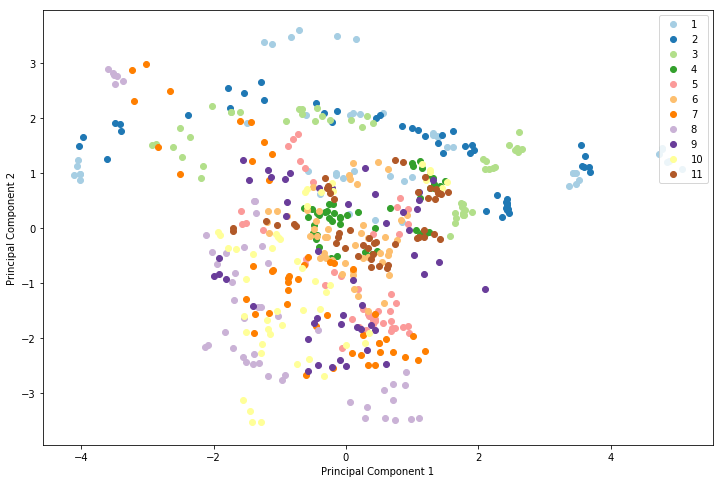

In [7]:
sklearn_pca = skdc.PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_1_std)

paired_cmap = plt.cm.get_cmap('Paired')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [paired_cmap(i) for i in np.linspace(0,1,11)]

plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y_1==lab, 0],Xred_pca[y_1==lab, 1],label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

---
### 1.d

#### LDA

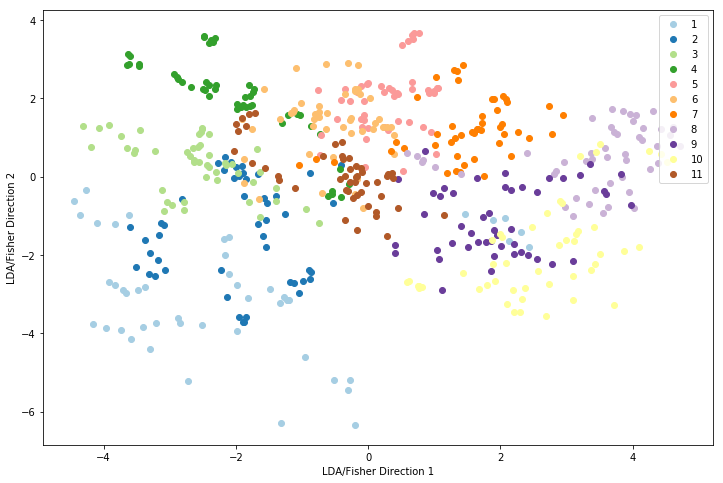

In [8]:
sklearn_lda = skda.LinearDiscriminantAnalysis(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_1_std,y_1)

plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y_1==lab, 0],Xred_lda[y_1==lab, 1],label=lab,c=col)
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

---
### 1.e

#### Comparación Cualitativa

De los gráficos podemos ver que si particionaramos el espacio en distintas regiones correspondientes a las diferentes clases, con _LDA_ tendríamos menos elementos mal clasificados que con _PCA_, ya que la superposición de elementos de diferentes clases es mucho menor.

Aparte, graficando los centros de gravedad de cada cluster, podemos ver que tan separadas quedan las clases.

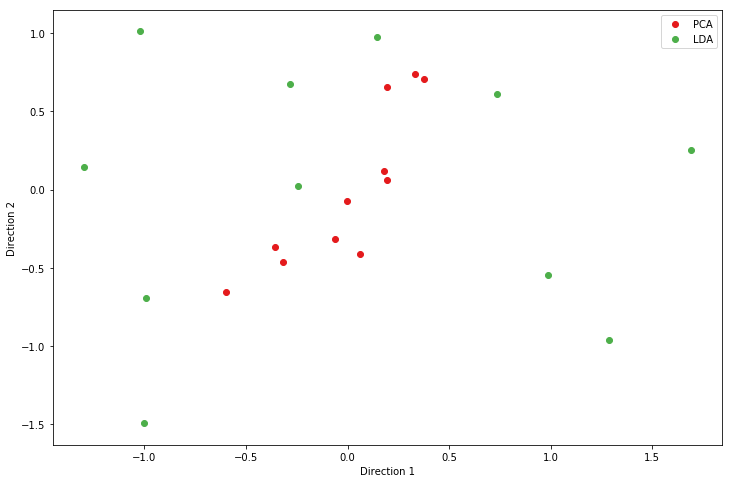

In [9]:
centers_pca = []
centers_lda = []

for lab in mclasses:
    centers_pca.append( np.sum(Xred_pca[y_1==lab], axis=0) /Xred_pca[y_1==lab].size )
    centers_lda.append( np.sum(Xred_lda[y_1==lab], axis=0) /Xred_lda[y_1==lab].size )
    
centers_pca = np.array(centers_pca)
centers_lda = np.array(centers_lda)

Set1_cmap = plt.cm.get_cmap('Set1')
green = Set1_cmap(0.25)
red = Set1_cmap(0)

plt.figure(figsize=(12, 8))
plt.scatter(centers_pca[:,0],centers_pca[:,1],label="PCA",c=red)
plt.scatter(centers_lda[:,0],centers_lda[:,1],label="LDA",c=green)
plt.xlabel('Direction 1')
plt.ylabel('Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

Podemos ver que los centros de _PCA_ se encuentran en una región mucho más acotada que los de _LDA_, lo cual no es deseable ya que si están más separados hay menos superposición.

---
### 1.f

#### Clasificador Aleatorio

In [10]:
# X_1_std.shape[0]
def random_classifier(x):
    return rnd.randint(1, 12, size=x.shape[0])

print("Porcentaje de acierto : ", y_1[(random_classifier(X_1) - y_1) == 0].size / y_1.size * 100)
print("Valor referencial     : ", 100/11)

Porcentaje de acierto :  9.280303030303031
Valor referencial     :  9.090909090909092


Se espera que la tasa de aciertos sea aproximadamente $\frac{1}{11}$, ya que para cada uno de los datos, el clasificador tiene por construcción una probabilidad de $\frac{1}{11}$ de acertar la clase correcta a la que pertenece el dato.

---
### 1.g

#### LDA - QDA - Vecinos más Cercanos

LDA:
train score:  0.683712121212
test score :  0.443722943723

QDA:
train score:  0.988636363636
test score :  0.471861471861

KNN:
max train score: (k=1) 1.0
max test score : (k=7) 0.5194805194805194
test score k=7 : 0.9640151515151515


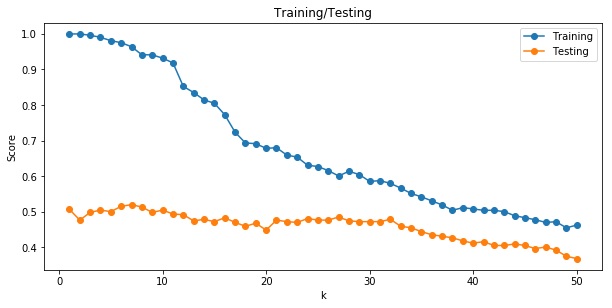

In [11]:
X_1_test = test_df_1.loc[:,'x.1':'x.10'].values
y_1_test = test_df_1.loc[:,'y'].values
X_1_std_test = sscaler.transform(X_1_test)

lda_model = skda.LinearDiscriminantAnalysis()
lda_model.fit(X_1_std,y_1)

print("LDA:")
print("train score: ", lda_model.score(X_1_std,y_1))
print("test score : ", lda_model.score(X_1_std_test,y_1_test))
print()

qda_model = skda.QuadraticDiscriminantAnalysis()
qda_model.fit(X_1_std,y_1)

print("QDA:")
print("train score: ", qda_model.score(X_1_std,y_1))
print("test score : ", qda_model.score(X_1_std_test,y_1_test))
print()

print("KNN:")
knn_scores_training = []
knn_scores_testing = []

k = range(1,51)
for c in k:
    knn_model = skng.KNeighborsClassifier(n_neighbors=c)
    knn_model.fit(X_1_std,y_1)
    knn_scores_training.append(knn_model.score(X_1_std,y_1))
    knn_scores_testing.append(knn_model.score(X_1_std_test,y_1_test))


print("max train score: (k={}) {}".format(np.argmax(knn_scores_training)+1, max(knn_scores_training)))
print("max test score : (k={}) {}".format(np.argmax(knn_scores_testing)+1, max(knn_scores_testing)))
print("test score k=7 : {}".format(knn_scores_training[6]))
    
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Training/Testing")
plt.plot(k,knn_scores_training, '-o',k,knn_scores_testing, '-o')
plt.legend(("Training", "Testing"), loc = "upper right")
plt.show()

* Sobre el conjunto de entrenamiento se comporta mejor _QDA_, excepto cuando _KNN_ usa un $k$ muy bajo, sin embargo esto no es tan deseable ya que podría existir _underfitting_.
* Sobre el conjunto de prueba el mejor es _KNN_ con $k=6$.
* Para $k$ grandes, _KNN_ podemos ver que el error en el _Train Set_ se acerca al error del _Test Set_, sin embargo a partir de cierto punto ámbos comienzan a decaer. Esto se debe a que se comienzan a considerar vecinos no tan cercanos, que alteran el resultado. Debido al tamaño de la muestra, 50 vecinos es un porcentaje demasiado significativo de la muestra. 
* Para $k$ pequeños el error es muy pequeño en el _Train Set_ pero no así en el _Test Set_.

---
### 1.h

#### PCA Again

In [12]:
lda_scores_pca = np.zeros((2,10))
qda_scores_pca = np.zeros((2,10))
knn_scores_pca = np.zeros((3,10))

for dim in range(10):
    current_pca = skdc.PCA(n_components=dim+1).fit(X_1_std)
    Xc_train_pca = current_pca.transform(X_1_std)
    Xc_test_pca = current_pca.transform(X_1_std_test)
    
    # LDA
    lda_model = skda.LinearDiscriminantAnalysis()
    lda_model.fit(Xc_train_pca,y_1)
    lda_scores_pca[:,dim] = np.array([
        lda_model.score(Xc_train_pca, y_1),
        lda_model.score(Xc_test_pca, y_1_test)
    ])
    
    # QDA
    qda_model = skda.QuadraticDiscriminantAnalysis()
    qda_model.fit(Xc_train_pca,y_1)
    qda_scores_pca[:,dim] = np.array([
        qda_model.score(Xc_train_pca, y_1),
        qda_model.score(Xc_test_pca, y_1_test)
    ])
    
    # KNN
    knn_scores_training = []
    knn_scores_testing = []

    k = range(1,31)
    for c in k:
        knn_model = skng.KNeighborsClassifier(n_neighbors=c)
        knn_model.fit(Xc_train_pca,y_1)
        knn_scores_training.append(knn_model.score(Xc_train_pca,y_1))
        knn_scores_testing.append(knn_model.score(Xc_test_pca,y_1_test))
        
    best_k = np.argmax(knn_scores_testing)
    knn_scores_pca[:,dim] = np.array([
        knn_scores_training[best_k],
        knn_scores_testing[best_k],
        best_k + 1
    ])

best k :  [ 15.  13.   1.   1.  12.   6.   2.   1.   6.   7.]


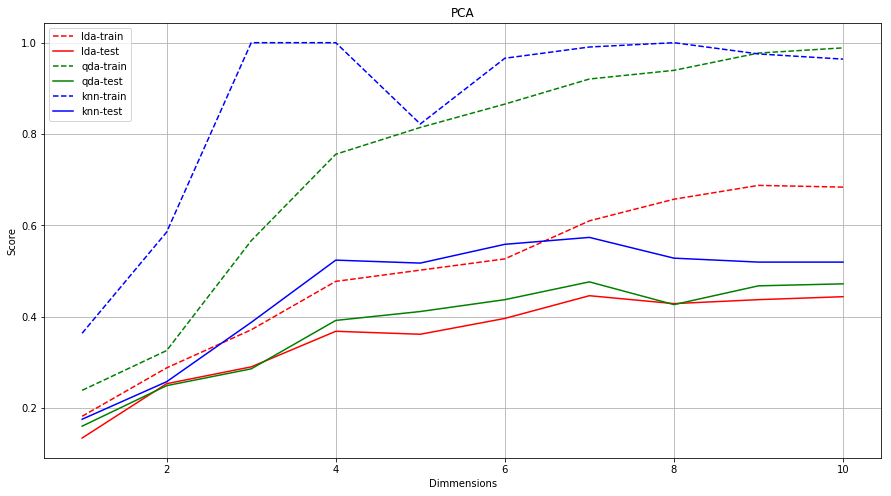

In [13]:
print("best k : ", knn_scores_pca[2,:])
plt.figure(figsize=(15,8))
plt.plot(range(1,11), lda_scores_pca[0,:], '--r', label="lda-train")
plt.plot(range(1,11), lda_scores_pca[1,:], '-r', label="lda-test")
plt.plot(range(1,11), qda_scores_pca[0,:], '--g', label="qda-train")
plt.plot(range(1,11), qda_scores_pca[1,:], '-g', label="qda-test")
plt.plot(range(1,11), knn_scores_pca[0,:], '--b', label="knn-train")
plt.plot(range(1,11), knn_scores_pca[1,:], '-b', label="knn-test")
plt.title("PCA")
plt.ylabel("Score")
plt.xlabel("Dimmensions")
plt.legend()
plt.grid()
plt.show()

Podemos ver en el gráfico que el desempeño de _PCA_ es relativamente creciente sobre el _test set_ y el error sobre el _train set_ es bajo en knn y qda. Esto no es tan deseable ya que el mayor desempeño se alcanza estando cerca de la dimensionalidad completa.

---
### 1.i

#### LDA

In [14]:
lda_scores_lda = np.zeros((2,10))
qda_scores_lda = np.zeros((2,10))
knn_scores_lda = np.zeros((3,10))

for dim in range(10):
    current_lda = skda.LinearDiscriminantAnalysis(n_components=dim+1).fit(X_1_std, y_1)
    Xc_train_lda = current_lda.transform(X_1_std)
    Xc_test_lda = current_lda.transform(X_1_std_test)
    
    # LDA
    lda_model = skda.LinearDiscriminantAnalysis()
    lda_model.fit(Xc_train_lda,y_1)
    lda_scores_lda[:,dim] = np.array([
        lda_model.score(Xc_train_lda, y_1),
        lda_model.score(Xc_test_lda, y_1_test)
    ])
    
    # QDA
    qda_model = skda.QuadraticDiscriminantAnalysis()
    qda_model.fit(Xc_train_lda,y_1)
    qda_scores_lda[:,dim] = np.array([
        qda_model.score(Xc_train_lda, y_1),
        qda_model.score(Xc_test_lda, y_1_test)
    ])
    
    # KNN
    knn_scores_training = []
    knn_scores_testing = []

    k = range(1,101)
    for c in k:
        knn_model = skng.KNeighborsClassifier(n_neighbors=c)
        knn_model.fit(Xc_train_lda,y_1)
        knn_scores_training.append(knn_model.score(Xc_train_lda,y_1))
        knn_scores_testing.append(knn_model.score(Xc_test_lda,y_1_test))
        
    best_k = np.argmax(knn_scores_testing)
    knn_scores_lda[:,dim] = np.array([
        knn_scores_training[best_k],
        knn_scores_testing[best_k],
        best_k + 1
    ])

best k :  [ 40.  33.  73.  62.  44.  70.  69.  58.   1.   9.]


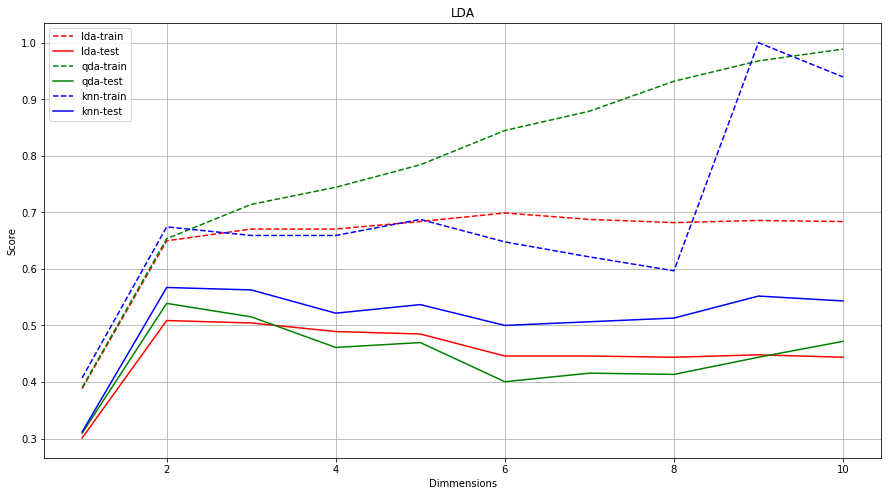

In [15]:
print("best k : ", knn_scores_lda[2,:])
plt.figure(figsize=(15,8))
plt.plot(range(1,11), lda_scores_lda[0,:], '--r', label="lda-train")
plt.plot(range(1,11), lda_scores_lda[1,:], '-r', label="lda-test")
plt.plot(range(1,11), qda_scores_lda[0,:], '--g', label="qda-train")
plt.plot(range(1,11), qda_scores_lda[1,:], '-g', label="qda-test")
plt.plot(range(1,11), knn_scores_lda[0,:], '--b', label="knn-train")
plt.plot(range(1,11), knn_scores_lda[1,:], '-b', label="knn-test")
plt.title("LDA")
plt.ylabel("Score")
plt.xlabel("Dimmensions")
plt.legend()
plt.grid()
plt.show()

Podemos ver que el rendimiento de _LDA_ crece muy rápido al principio, lo que hace que tengamos buenos resultados en dimensiones bajas. Posteriormente se mantiene relativamente constante, disminuyendo incluso en la mayor parte de los casos. Esto significa que _LDA_ no solo es eficiente conservando la información relevante si no que también disminuyendo el ruido.

---

---
## 2.- Análisis de Opiniones sobre Películas

---
### 2.a

#### Datos

In [16]:
# train_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train"
# test_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev"

# train_data_f = req.urlretrieve(train_data_url, "train_data_2.csv")
# test_data_f = req.urlretrieve(test_data_url, "test_data_2.csv")

with open("train_data_2.csv", encoding='ISO-8859-1') as ftr:
    rows = [line.strip().split(" ",1) for line in ftr.readlines()]
    train_df_2 = pd.DataFrame(rows, columns=['Sentiment','Text'])
    train_df_2['Sentiment'] = pd.to_numeric(train_df_2['Sentiment'])

with open("test_data_2.csv", encoding='ISO-8859-1') as fts:
    rows = [line.strip().split(" ",1) for line in fts.readlines()]
    test_df_2 = pd.DataFrame(rows, columns=['Sentiment','Text'])
    test_df_2['Sentiment'] = pd.to_numeric(test_df_2['Sentiment'])

print(train_df_2.shape)
print(test_df_2.shape)

(3554, 2)
(3554, 2)


Podemos ver que tanto el _train set_ como el _test set_ tienen 3554 comentarios.

In [17]:
train_df_2.head()

,Sentiment,Text
0,-1,"everything's serious , poetic , earnest and --..."
1,-1,"narratively , trouble every day is a plodding ..."
2,1,a truly wonderful tale combined with stunning ...
3,1,jason patric and ray liotta make for one splen...
4,-1,haneke keeps us at arm's length . guided more ...


In [18]:
test_df_2.tail()

,Sentiment,Text
3549,1,a fascinating documentary about the long and e...
3550,1,the filmmakers' eye for detail and the high st...
3551,1,throwing caution to the wind with an invitatio...
3552,-1,"a big , baggy , sprawling carnival of a movie..."
3553,1,"an incendiary , deeply thought-provoking look ..."


---
### 2.b

#### Word extractor, Part I

In [19]:
def word_extractor0(text):
    ps = nlpt.PorterStemmer()
    commonwords = nlcp.stopwords.words('english')
    commonwords.remove('not')
    
    text = re.sub(r'([a-z])\1+', r'\1\1', text)
    words = []
    wordtokens = [word.lower() for word in nltk.word_tokenize(text)]
    
    for word in wordtokens:
        if word not in commonwords:
            words.append(word)
            
    return " ".join(words)

In [44]:
print(word_extractor0("I love to eat cake"))
print(word_extractor0("I love eating cake"))
print(word_extractor0("I loved eating the cake"))
print(word_extractor0("I do not love eating cake"))
print(word_extractor0("I don't love eating cake"))
print()
print(word_extractor0("I loooooooooooooove eating caaaaaaaaaaaaake"))
print(word_extractor0("Iloveeatingcakeing!"))
print(word_extractor0("I love eating cakes"))

love eat cake
love eating cake
loved eating cake
not love eating cake
n't love eating cake

loove eating caake
iloveeatingcakeing !
love eating cakes


In [23]:
def word_extractor(text):
    ps = nlpt.PorterStemmer()
    commonwords = nlcp.stopwords.words('english')
    commonwords.remove('not')
    
    text = re.sub(r'([a-z])\1+', r'\1\1', text)
    words = []
    wordtokens = [ps.stem(word.lower()) for word in nltk.word_tokenize(text)]
    
    for word in wordtokens:
        if word not in commonwords:
            words.append(word)
            
    return " ".join(words)

In [26]:
print(word_extractor("I love to eat cake"))
print(word_extractor("I love eating cake"))
print(word_extractor("I loved eating the cake"))
print(word_extractor("I do not love eating cake"))
print(word_extractor("I don't love eating cake"))
print()
print(word_extractor("I loooooooooooooove eating caaaaaaaaaaaaake"))
print(word_extractor("Iloveeatingcakeing!"))
print(word_extractor("I love eating cakes"))

love eat cake
love eat cake
love eat cake
not love eat cake
n't love eat cake

loov eat caak
iloveeatingcak !
love eat cake


Podemos ver que la función deja toda la oración en _lowercase_ para poder agrupar bien las palabras, elimina las palabras comunes (excepto not ya que influye en el _Sentiment_), también reduce los grupos de caracteres repetidos a un máximo de 2.

Además el agregar Stemming remueve las conjugaciones de las palabras, dejando solo la raíz para desligar la palabra de su contexto gramatical.

---
### 2.c

#### Word extractor, Part II

In [27]:
def word_extractor2(text):
    wordlemmatizer = nltk.WordNetLemmatizer()
    commonwords = nlcp.stopwords.words('english')
    commonwords.remove('not')
    
    text = re.sub(r'([a-z])\1+', r'\1\1', text)
    words = []
    wordtokens = [wordlemmatizer.lemmatize(word.lower()) for word in nltk.word_tokenize(text)]
    
    for word in wordtokens:
        if word not in commonwords:
            words.append(word)
            
    return " ".join(words)

In [28]:
print(word_extractor2("I love to eat cake"))
print(word_extractor2("I love eating cake"))
print(word_extractor2("I loved eating the cake"))
print(word_extractor2("I do not love eating cake"))
print(word_extractor2("I don't love eating cake"))
print()
print(word_extractor2("I loooooooooooooove eating caaaaaaaaaaaaake"))
print(word_extractor2("Iloveeatingcakeing!"))
print(word_extractor2("I love eating cakes"))

love eat cake
love eating cake
loved eating cake
not love eating cake
n't love eating cake

loove eating caake
iloveeatingcakeing !
love eating cake


La diferencia apreciable es que lematizar deja las conjugaciones, ya que prefiere dejar en dos clases distintas palabras parecidas antes que clasificar erroneamente palabras diferentes, lo cual no es necesariamente deseable.

---
### 2.d

#### Representación vectorial de los datos

In [55]:
texts_train_lemmatizer = [word_extractor2(text) for text in train_df_2.Text]
texts_test_lemmatizer = [word_extractor2(text) for text in test_df_2.Text]

texts_train_stemming = [word_extractor(text) for text in train_df_2.Text]
texts_test_stemming = [word_extractor(text) for text in test_df_2.Text]

vectorizer_l = sktx.CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer_l.fit(np.asarray(texts_train_lemmatizer))

vectorizer_s = sktx.CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer_s.fit(np.asarray(texts_train_stemming))

features_train_l = vectorizer_l.transform(texts_train_lemmatizer)
features_test_l = vectorizer_l.transform(texts_test_lemmatizer)

features_train_s = vectorizer_s.transform(texts_train_stemming)
features_test_s = vectorizer_s.transform(texts_test_stemming)

labels_train = np.asarray((train_df_2.Sentiment.astype(float)+1)/2.0)
labels_test = np.asarray((test_df_2.Sentiment.astype(float)+1)/2.0)

vocab = vectorizer_l.get_feature_names()
dist = list(np.array(features_train_l.sum(axis=0)).reshape(-1,))

for tag, count in zip(vocab, dist):
    print(count, tag)

6 10
4 100
2 101
1 105
2 10th
4 11
2 110
1 11th
1 12
2 13
1 13th
1 14
1 140
1 146
3 15
1 16
1 163
2 170
1 18th
4 19
2 1915
1 1934
1 1938
1 1940s
2 1950
1 1950s
1 1954
1 1955
1 1958
1 1959
2 1960s
1 1967
1 1972
3 1975
1 1978
1 1979
2 1980
1 1991
1 1992
2 1995
3 19th
4 20
2 2000
7 2002
4 20th
2 21st
1 22
1 24
2 25
1 25s
2 30
1 300
2 3000
1 30s
1 37
1 3d
5 40
1 400
1 401
1 40s
1 451
1 48
1 49
4 4ever
3 50
2 51
1 53
1 5ths
2 60s
1 65
1 65th
4 70s
1 71
1 77
1 78
1 79
4 80
1 800
3 80s
2 84
2 85
1 88
1 8th
13 90
1 90s
1 93
1 94
2 95
1 96
1 97
2 99
1 aaliyah
2 abandon
1 abandono
1 abbass
1 abbreviated
1 abc
2 abel
1 abhorrent
1 abiding
11 ability
6 able
3 ably
1 aboul
3 above
1 abrahams
1 abrams
1 abrasive
2 abroad
1 abruptly
2 absolute
7 absolutely
1 absorb
1 absorbed
10 absorbing
1 absorption
5 abstract
2 absurd
3 absurdist
4 absurdity
1 absurdly
1 aburrido
4 abuse
1 abysmally
1 acabamos
1 academic
2 academy
7 accent
1 accentuating
2 accept
1 accepting
10 accessible
2 accident
1 accidental
1

2 byler
1 bypass
1 byron
41 ca
1 cabin
3 cable
1 cackle
1 cacophony
1 cacoyannis
1 cada
1 caddyshack
2 caesar
1 cafe
1 caffeinated
1 café
5 cage
1 cahill
7 caine
1 cal
1 calamity
1 calcified
4 calculated
3 calculating
2 caliber
2 calibrated
1 california
17 call
3 callar
7 called
2 calling
1 callow
1 calvin
1 camaraderie
1 camareras
3 came
4 cameo
15 camera
1 cameron
3 camouflage
8 camp
1 campanella
1 campfire
1 campion
1 campus
1 campy
2 canada
1 canadian
2 cancer
1 candidly
1 candle
3 candy
3 canned
2 cannes
1 canning
3 canny
1 canon
2 cantet
4 capable
1 capably
2 capacity
7 caper
1 capitalize
1 capricious
1 capsule
1 captain
1 captivates
2 captivating
1 captivatingly
2 captive
1 captor
15 capture
4 captured
2 capturing
1 capturou
6 car
3 card
1 cardboard
1 cardellini
1 cardoso
25 care
1 cared
1 careen
12 career
2 careful
2 carefully
1 caretaker
1 careworn
3 caricature
2 caring
1 carl
1 carlin
1 carmen
1 carnage
1 carnahan
2 carol
1 carpenter
2 carried
6 carry
2 carrying
1 carter
13 c

3 elling
1 elliott
1 elliptical
1 elliptically
1 eloquence
1 eloquent
20 else
3 elsewhere
1 eludes
3 elusive
2 elvis
4 em
1 emailed
1 embarking
1 embarrassing
2 embarrassment
1 ember
1 embodies
7 embrace
1 embracing
2 emerge
3 emerges
2 emerging
1 emi
2 eminently
1 emocionalmente
13 emotion
22 emotional
18 emotionally
1 empathetic
4 empathy
2 emperor
1 emphasis
1 emphasising
4 emphasizes
1 emphasizing
4 empire
3 employ
2 empowerment
1 emptiness
6 empty
1 emptying
1 en
1 enact
1 enacted
1 enchanted
2 enchantment
1 encompasses
5 encounter
1 encountered
1 encountering
2 encourage
1 encouraging
60 end
3 endearing
3 endeavor
3 ended
1 endemic
1 endgame
22 ending
3 endless
3 endlessly
2 endurance
3 endure
1 endured
3 enduring
4 enemy
9 energetic
1 energizes
1 energizing
19 energy
1 enervated
1 enervating
1 enforced
1 enforcement
4 engage
1 engaged
2 engages
24 engaging
2 engagingly
4 england
5 english
1 englishman
1 engorged
1 engross
7 engrossing
1 engulfed
2 enhances
1 enhancing
2 enigma
1

1 infidelity
1 infiltrated
2 infinitely
1 inflated
1 inflict
1 inflicted
4 influence
2 influenced
1 influential
2 infomercial
1 inform
1 information
1 informative
1 infrequently
2 infuriating
1 infuses
1 infusion
2 ingenious
1 ingeniously
1 ingenue
4 ingredient
5 inherent
1 inherently
1 inhospitability
2 initial
2 initially
1 initiation
1 injected
2 injury
1 injustice
1 ink
1 inmate
7 inner
1 inning
4 innocence
1 innocuous
2 innovation
3 innovative
4 inoffensive
1 inquisitive
2 insane
1 insanely
1 insanity
1 inscrutable
2 insecure
1 insensitivity
7 inside
3 insider
14 insight
7 insightful
3 insightfully
2 insignificance
3 insipid
1 insisted
2 insistently
3 insomnia
1 inspection
1 inspiration
1 inspirational
5 inspire
10 inspired
2 inspires
8 inspiring
3 installment
1 instance
4 instantly
30 instead
4 instinct
1 instruct
1 instructive
1 insufferably
1 insufficiently
1 insult
3 insulting
1 insurance
1 intacto
2 integrated
1 integrates
1 integrating
2 integrity
3 intellect
9 intellectual


2 patch
1 patched
1 patchwork
5 path
3 pathetic
2 pathetically
1 pathological
1 pathologically
3 pathology
5 pathos
3 patience
3 patient
1 patiently
1 patric
1 patronized
1 patronizing
1 patter
1 pattern
2 paul
2 paulette
2 pauline
1 pausado
1 pause
1 pausing
2 paxton
7 pay
3 paying
5 payoff
2 pb
1 pea
2 peace
2 peak
1 pearl
2 peculiar
1 peculiarly
1 pedagogy
1 peddled
1 pedestal
2 pedestrian
3 pedigree
1 pedro
2 peek
1 peeved
1 peevish
1 peg
2 pellington
1 pelosi
1 película
1 pen
2 penalty
2 penetrating
1 penn
1 pensar
54 people
2 peploe
1 pepper
1 peppered
1 per
1 perabo
1 peralta
1 perceptive
1 percolating
1 percussion
3 perdition
1 perdão
10 perfect
1 perfection
9 perfectly
114 performance
2 performed
7 performer
1 performing
1 performs
11 perhaps
5 peril
2 perilously
12 period
1 perkiness
1 permeate
2 permeates
1 permitting
2 perpetual
1 perplexing
1 perry
1 persecution
1 perseverance
1 persistence
1 persistent
1 persnickety
10 person
8 persona
1 personajes
12 personal
4 personali

1 someday
8 somehow
12 someone
1 someplace
58 something
1 somethings
19 sometimes
7 somewhat
7 somewhere
1 sommers
1 somnambulant
1 somnolent
3 son
12 song
2 sonny
1 sonrisa
7 soon
1 soothing
2 sophie
7 sophisticated
3 sophistication
2 sophomore
1 soprano
3 sordid
1 sorely
1 sorimachi
1 sorrow
1 sorrowful
1 sorrowfully
3 sorry
25 sort
1 sorvino
10 soul
3 soulful
2 soulless
19 sound
7 soundtrack
1 soup
4 sour
5 source
6 south
3 southern
4 space
1 spaceship
1 spacey
1 span
1 spangle
2 spanish
2 spanning
6 spare
4 spark
1 sparkle
1 sparkling
1 sparring
1 spasm
2 speak
3 speaking
2 speaks
2 spear
42 special
1 specialty
1 species
2 specific
3 specifically
1 specificity
1 specimen
1 speck
11 spectacle
6 spectacular
1 spectacularly
3 spectator
1 specter
1 spectrum
2 speculative
1 speech
1 speed
1 speedy
3 spell
1 spelled
1 spencer
7 spend
3 spends
4 spent
3 spice
2 spiced
1 spicy
1 spider
6 spielberg
1 spike
2 spin
1 spindly
1 spine
2 spinning
1 spinotti
17 spirit
4 spirited
1 spiritual
1 spi

In [30]:
word_idx = np.argsort(dist)
word_idx = word_idx[::-1]
sorted_dist = np.array(dist)[word_idx]
sorted_vocab = np.array(vocab)[word_idx]

print("Train Set:")
for i in range(20):
    print("{:>2}.- {:>13} - occurrences: {}".format(i+1, sorted_vocab[i], sorted_dist[i]))

Train Set:
 1.-          film - occurrences: 567
 2.-         movie - occurrences: 481
 3.-           not - occurrences: 266
 4.-           one - occurrences: 246
 5.-          like - occurrences: 245
 6.-            ha - occurrences: 224
 7.-          make - occurrences: 183
 8.-         story - occurrences: 176
 9.-     character - occurrences: 163
10.-        comedy - occurrences: 145
11.-          even - occurrences: 143
12.-          time - occurrences: 143
13.-          good - occurrences: 141
14.-          much - occurrences: 128
15.-           doe - occurrences: 127
16.-           way - occurrences: 115
17.-   performance - occurrences: 114
18.-          well - occurrences: 113
19.-          work - occurrences: 113
20.-      director - occurrences: 108


In [31]:
dist2 = list(np.array(features_test_l.sum(axis=0)).reshape(-1,))

word_idx2 = np.argsort(dist2)
word_idx2 = word_idx2[::-1]
sorted_dist2 = np.array(dist2)[word_idx2]
sorted_vocab2 = np.array(vocab)[word_idx2]

print("Test Set:")
for i in range(20):
    print("{:>2}.- {:>13} - occurrences: {}".format(i+1, sorted_vocab2[i], sorted_dist2[i]))

Test Set:
 1.-          film - occurrences: 558
 2.-         movie - occurrences: 541
 3.-           not - occurrences: 278
 4.-           one - occurrences: 250
 5.-            ha - occurrences: 238
 6.-          like - occurrences: 230
 7.-         story - occurrences: 197
 8.-     character - occurrences: 175
 9.-          time - occurrences: 165
10.-          make - occurrences: 161
11.-        comedy - occurrences: 134
12.-          good - occurrences: 132
13.-           doe - occurrences: 132
14.-          even - occurrences: 129
15.-          much - occurrences: 124
16.-      director - occurrences: 113
17.-          well - occurrences: 105
18.-          work - occurrences: 104
19.-           way - occurrences: 102
20.-   performance - occurrences: 95


---
### 2.e

#### Evaluar el desempeño

In [47]:
def score_the_model(model, x, y, xt, yt, text):
    acc_tr = model.score(x, y)
    acc_test = model.score(xt[:-1], yt[:-1])
    
    print("Train Accuracy {} : {}".format(text, acc_tr))
    print(" Test Accuracy {} : {}".format(text, acc_test), end='\n\n')
    print("Detailed Analysis Testing Results:")
    print(skmt.classification_report(yt, model.predict(xt), target_names=['+','-']))

##### precision - recall

* La presición corresponde a la relación entre los elementos bien clasificados de una clase y todos los elementos clasificados en esa clase.
* La exhaustividad (_recall_) corresponde a la relación entre los elementos bien clasificados, pero esta vez con el total de los elementos que realmente pertenecen a la clase.

Lo anterior se explica mejor en la siguiente imágen:

<img src="precision-recall.png" alt="imagen" style="width: 400px;"/>

* El $F_1\text{-score}$ se calcula de la siguiente manera:
$$ F_1 = 2 \cdot \frac{1}{\frac{1}{\text{recall}} + \frac{1}{\text{precision}}} $$

Como podemos ver, este _score_ toma en cuenta tanto la exhaustividad como la presición, ya que si solo la presición es alta hay muchos elementos de la clase que no tomamos en cuenta, mientras que si solo la exhaustividad es alta estamos clasificando dentro de la clase muchos elementos que no pertenecen.

* El _support_ es el numero de ocurrencias de cada clase en $y$.

---
### 2.f

#### Naive Bayes

In [48]:
def do_NAIVE_BAYES(x, y, xt, yt):
    model = sknb.BernoulliNB()
    model = model.fit(x, y)
    score_the_model(model, x, y, xt, yt, "BernoulliNB")
    return model

In [98]:
print("Naive Bayes Stemming:")
model = do_NAIVE_BAYES(features_train_s, labels_train, features_test_s, labels_test)
test_pred_s = model.predict_proba(features_test_s)
spl_s = rnd.randint(len(test_pred_s), size=15)

Naive Bayes Stemming:
Train Accuracy BernoulliNB : 0.9425998874507597
 Test Accuracy BernoulliNB : 0.7481001970166057

Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.76      0.74      0.75      1803
          -       0.74      0.75      0.75      1751

avg / total       0.75      0.75      0.75      3554



In [60]:
print("Naive Bayes Lemmatizer:")
model = do_NAIVE_BAYES(features_train_l, labels_train, features_test_l, labels_test)
test_pred_l = model.predict_proba(features_test_l)
spl_l = rnd.randint(len(test_pred_l), size=15)

Naive Bayes Lemmatizer:
Train Accuracy BernoulliNB : 0.9589195272931907
 Test Accuracy BernoulliNB : 0.7379679144385026

Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.75      0.72      0.74      1803
          -       0.73      0.75      0.74      1751

avg / total       0.74      0.74      0.74      3554



In [117]:
for s, (sentiment, text) in zip(labels_test[spl_s], zip(test_pred_s[spl_s], test_df_2.Text[spl_s])):
    print(
        "label: {} {}".format(s, '✔' if s == (sentiment[0] < 0.5) else '✘'),
        "p(y = 0): {:>.10}\np(y = 1): {:>.10}".format(*sentiment),
        text, end='\n\n', sep='\n'
    )

label: 0.0 ✘
p(y = 0): 0.1202582272
p(y = 1): 0.8797417728
narc is all menace and atmosphere .

label: 1.0 ✔
p(y = 0): 0.4407626518
p(y = 1): 0.5592373482
it is ridiculous , of course . . . but it is also refreshing , disarming , and just outright enjoyable despite its ridiculousness .

label: 0.0 ✔
p(y = 0): 0.5282221714
p(y = 1): 0.4717778286
one minute , you think you're watching a serious actioner ; the next , it's as though clips from the pink panther strikes again and/or sailor moon have been spliced in .

label: 0.0 ✔
p(y = 0): 0.9270101833
p(y = 1): 0.07298981666
the vintage is pure '87 , with a halfhearted twist on its cautionary message : fatal attraction = don't have an affair with a nutjob ; unfaithful = don't if you're married to one .

label: 1.0 ✘
p(y = 0): 0.6424365781
p(y = 1): 0.3575634219
the directive to protect the code at all costs also begins to blur as the importance of the man and the code merge

label: 1.0 ✘
p(y = 0): 0.6393138292
p(y = 1): 0.3606861708
a spel

---
### 2.g

#### SVM

In [35]:
def do_SVM(x, y, xt, yt):
    Cs = np.logspace(-2, 4, 7)
    
    for C in Cs:
        print("C value: {}".format(C))
        model = sksvm.LinearSVC(C=C)
        model = model.fit(x, y)
        score_the_model(model, x, y, xt, yt, "SVM")

In [36]:
do_SVM(features_train_l, labels_train, features_test_l, labels_test)

C value: 0.01
Train Accuracy SVM: 0.8851997749015195
Test Accuracy SVM : 0.7162960878131157
Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.72      0.72      0.72      1803
          -       0.71      0.71      0.71      1751

avg / total       0.72      0.72      0.72      3554

C value: 0.1
Train Accuracy SVM: 0.9898705683736635
Test Accuracy SVM : 0.7247396566282015
Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.73      0.72      0.73      1803
          -       0.72      0.73      0.72      1751

avg / total       0.72      0.72      0.72      3554

C value: 1.0
Train Accuracy SVM: 1.0
Test Accuracy SVM : 0.7151702786377709
Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.73      0.71      0.72      1803
          -       0.71      0.72      0.71      1751

avg / total       0.72      0.72      0.72   

---

---
## 3.- Fraude en Transacciones Bancarias

---
### 3.a

#### Cantidad de elementos por clase

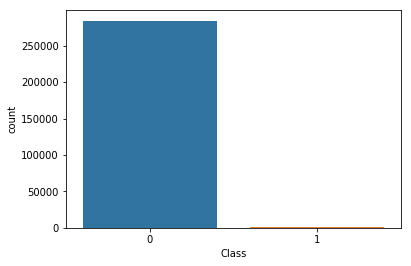

In [37]:
dt = pd.read_csv("creditcard.csv", header=0)
sns.countplot("Class", data=dt)
plt.show()

---
### 3.b

#### Estandarización

In [38]:
dt["nAmount"] = skpp.StandardScaler().fit_transform(dt["Amount"].values.reshape(-1,1))
dt.drop(["Time", "Amount"], axis=1, inplace=True)
dt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,nAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


---
### 3.c

#### Modelo y Matriz de Confusión

In [39]:
def model(model, features_train_l, features_test_l, labels_train, labels_test):
    clf = model
    clf.fit(features_train_l, labels_train.values.ravel())
    pred = clf.predict(features_test_l)
    
    cnf_matrix = skmt.confusion_matrix(labels_test, pred)
    recall = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[1,0])
    print("The recall for this model is:", recall)
    
    fig = plt.figure(figsize=(6,3))
    print("TP:", cnf_matrix[1,1])
    print("TN:", cnf_matrix[0,0])
    print("FP:", cnf_matrix[0,1])
    print("FN:", cnf_matrix[1,0])
    
    sns.heatmap(cnf_matrix, cmap="coolwarm_r", annot=True, linewidths=0.5)
    plt.title("Confussion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Real Class")
    plt.show()
    
    print()
    print("Classification Report:")
    print(skmt.classification_report(labels_test, pred))
    
    ''' You have to complete this function, ROC Curve is missing '''

---
### 3.d

#### Preparación de los datos

In [40]:
def data_preparation(x):
    x_features = x.iloc[:,x.columns != "Class"]
    x_labels = x.iloc[:,x.columns == "Class"]
    x_train, x_test, y_train, y_test = skms.train_test_split(x_features, x_labels, test_size=0.3)
    
    print("Length of training data: {}".format(len(x_train)))
    print("Length of test data: {}".format(len(x_test)))
    return(x_train,x_test,y_train,y_test)

---
### 3.e

#### Undersample

In [41]:
def undersample(data,times):
    fraud_indices = np.array(data[data.Class==1].index)
    normal_indices = np.array(data[data.Class==0].index)
    
    Count_Normal_transacation = len(data[data["Class"]==0])
    Count_Fraud_transacation = len(data[data["Class"]==1])
    
    Normal_indices_undersample = np.array(
        np.random.choice(
            normal_indices,
            (times*Count_Fraud_transacation),
            replace=False
        )
    )
    
    undersample_data = np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    
    normal = len(undersample_data[undersample_data.Class==0]) / len(undersample_data["Class"])
    print("The normal transacation proportion is : {}".format(normal))
    
    fraud = len(undersample_data[undersample_data.Class==1]) / len(undersample_data["Class"])
    print("The fraud transacation proportion is : {}".format(fraud))
    
    return(undersample_data)

---
### 3.f

#### Logistic Regression y Undersample

Length of training data: 199364
Length of test data: 85443
The undersample data for 1 proportion

The normal transacation proportion is : 0.5
The fraud transacation proportion is : 0.5

----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data: 478
Length of test data: 206
The recall for this model is: 0.875
TP: 91
TN: 99
FP: 3
FN: 13


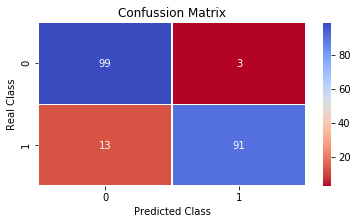


Classification Report:
             precision    recall  f1-score   support

          0       0.88      0.97      0.93       102
          1       0.97      0.88      0.92       104

avg / total       0.93      0.92      0.92       206

--------------------------Testing Set---------------------------
The recall for this model is: 0.926666666667
TP: 139
TN: 81925
FP: 3368
FN: 11


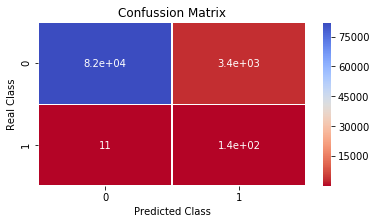


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     85293
          1       0.04      0.93      0.08       150

avg / total       1.00      0.96      0.98     85443

---------------------------------------------------------------
The undersample data for 2 proportion

The normal transacation proportion is : 0.6666666666666666
The fraud transacation proportion is : 0.3333333333333333

----------------------Validation Set------------------------

The model classification for 2 proportion

Length of training data: 718
Length of test data: 308
The recall for this model is: 0.914285714286
TP: 96
TN: 200
FP: 3
FN: 9


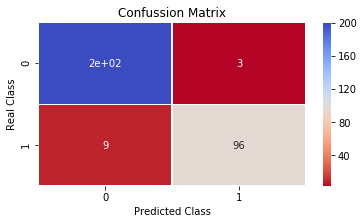


Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       203
          1       0.97      0.91      0.94       105

avg / total       0.96      0.96      0.96       308

--------------------------Testing Set---------------------------
The recall for this model is: 0.92
TP: 138
TN: 83111
FP: 2182
FN: 12


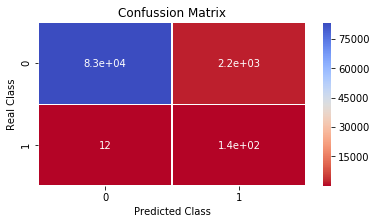


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     85293
          1       0.06      0.92      0.11       150

avg / total       1.00      0.97      0.99     85443

---------------------------------------------------------------
The undersample data for 3 proportion

The normal transacation proportion is : 0.75
The fraud transacation proportion is : 0.25

----------------------Validation Set------------------------

The model classification for 3 proportion

Length of training data: 957
Length of test data: 411
The recall for this model is: 0.79797979798
TP: 79
TN: 311
FP: 1
FN: 20


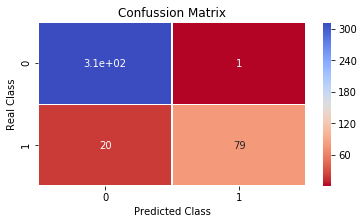


Classification Report:
             precision    recall  f1-score   support

          0       0.94      1.00      0.97       312
          1       0.99      0.80      0.88        99

avg / total       0.95      0.95      0.95       411

--------------------------Testing Set---------------------------
The recall for this model is: 0.893333333333
TP: 134
TN: 84384
FP: 909
FN: 16


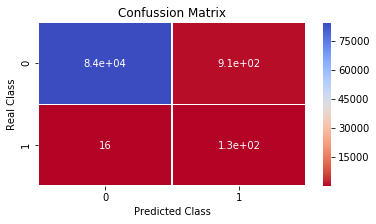


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85293
          1       0.13      0.89      0.22       150

avg / total       1.00      0.99      0.99     85443

---------------------------------------------------------------


In [42]:
x_tr, x_ts, y_tr, y_ts = data_preparation(dt)
x_tr["Class"] = y_tr["Class"]
x_tr = x_tr.reset_index(drop=True)

for i in range(1,4):
    print("The undersample data for {} proportion".format(i), end='\n\n')
    Undersample_data = undersample(x_tr,i)
    print()
    print("----------------------Validation Set------------------------", end='\n\n')
    print("The model classification for {} proportion".format(i), end='\n\n')
    
    under_x, under_xt, under_yx, under_yxt = data_preparation(Undersample_data)
    clf = sklm.LogisticRegression()
    model(clf, under_x, under_xt, under_yx, under_yxt)
    print("--------------------------Testing Set---------------------------")
    model(clf, under_x, x_ts, under_yx, y_ts)
    print("---------------------------------------------------------------")

---
### 3.g

#### Oversampling y SMOTE

In [43]:
os = imbos.SMOTE(random_state=0)
os_data_X, os_data_y = os.fit_sample(x_tr,y_tr)

/home/vlizana/u/machine-learning/env/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---

---

---